In [36]:
import serial
import time
import csv
import os 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,8)

In [37]:
ser = serial.Serial('/dev/tty.usbmodem56064601')
ser.flushInput()

# sum will treat Boolean True as a 1, False as a 0
n = sum(os.path.isfile(name) for name in os.listdir('.'))
file_name = "Encoder_data_%s.cvs" % n 
print(file_name)

# 0.5 to 6 Hz linear chirp in 10s

Encoder_data_112.cvs


In [39]:
t = []
RPM = []
V1 = []
V5 =[]

N= 100000

for jj in np.arange(N):
    ser_byte = ser.readline()
    #print(ser_byte)
    decoded_bytes = ser_byte.decode('ascii').split(',')
    #print(decoded_bytes)
    dt = float(decoded_bytes[0])
    dRPM = float(decoded_bytes[1])
    dV1 = float(decoded_bytes[2])
    dV5 = float(decoded_bytes[3])
    t.append(dt)
    RPM.append(dRPM)
    V1.append(dV1)
    V5.append(dV5)

    with open(file_name, "a+", newline='') as file:
      writer = csv.writer(file, delimiter=',')
      writer.writerow([dt, dRPM, dV1, dV5])


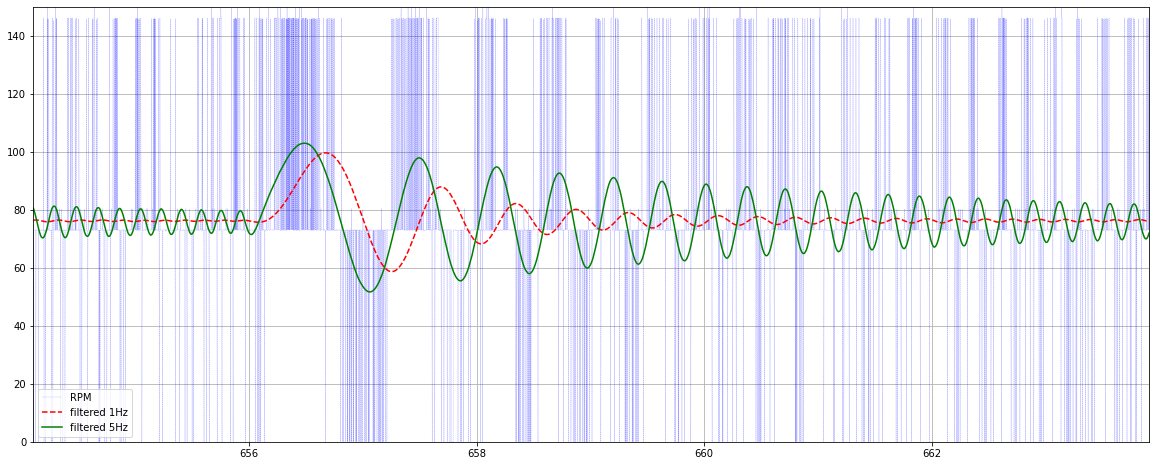

In [40]:
Nlow = 100
Nhigh = 5000

fig, ax = plt.subplots()
ax.plot(t[Nlow:Nhigh],RPM[Nlow:Nhigh],'b:',lw=0.25)
ax.plot(t[Nlow:Nhigh],V1[Nlow:Nhigh],'r--')
ax.plot(t[Nlow:Nhigh],V5[Nlow:Nhigh],'g-')
ax.set_xlim(t[Nlow], t[Nhigh])
ax.set_ylim(0, 150)
plt.legend(['RPM','filtered 1Hz','filtered 5Hz'])
plt.grid()
plt.show()

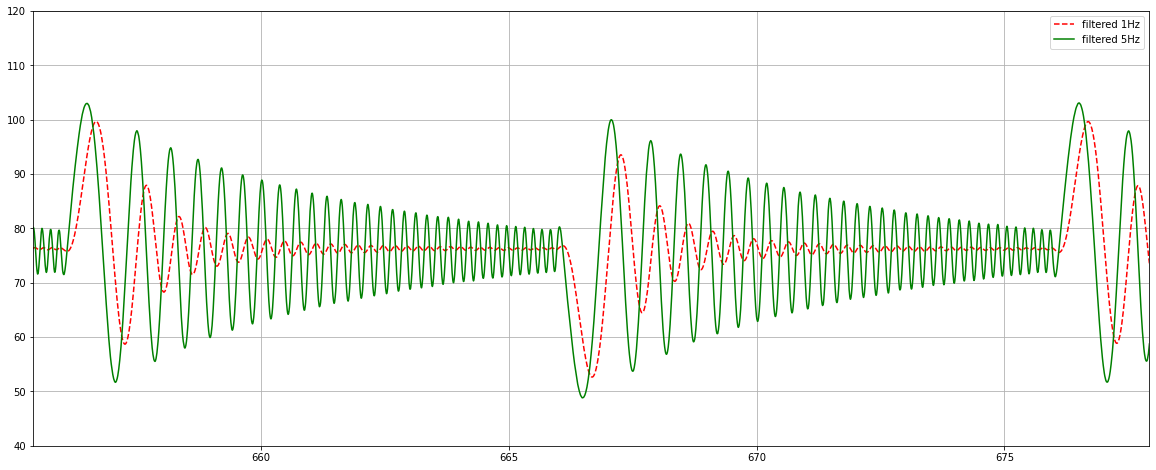

In [47]:
fig, ax = plt.subplots()

ax.plot(t,V1,'r--')
ax.plot(t,V5,'g-')

Nlow = 750
Nhigh = 12000
ax.set_xlim(t[Nlow], t[Nhigh])

ax.set_ylim(40, 120)
plt.legend(['filtered 1Hz','filtered 5Hz'])
plt.grid()
plt.show()

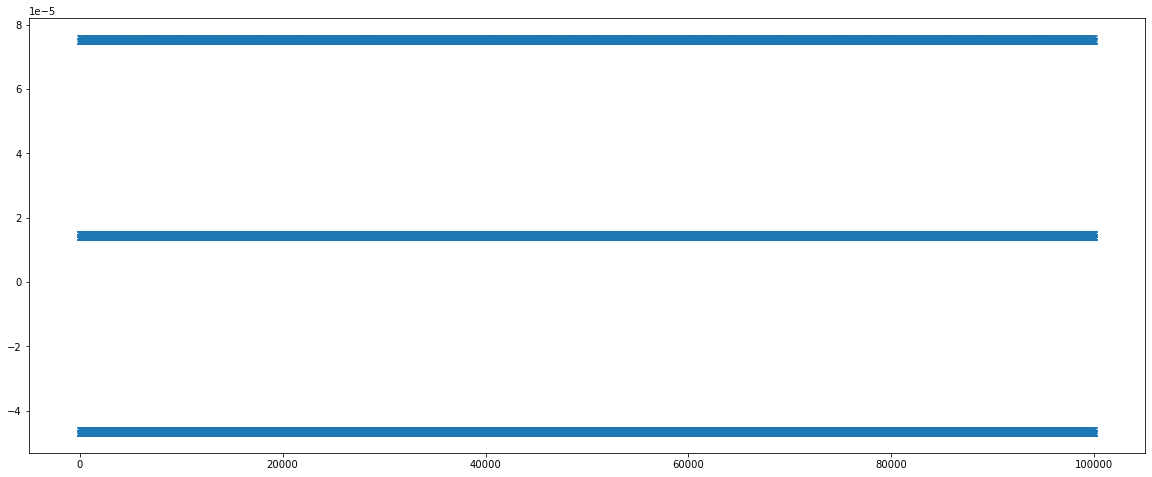

In [44]:
# check timing
plt.plot(np.diff(t) - 2000e-6,'x')
plt.show()